In [2]:
import tensorflow as tf
print("GPUs Disponiveis: ", len(tf.config.list_physical_devices('GPU')))
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
import seaborn as sns
import warnings
import shap
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, roc_auc_score, auc
from xgboost import plot_tree

warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")
warnings.filterwarnings("ignore", category=FutureWarning, module="xgboost")
warnings.filterwarnings("ignore", category=FutureWarning, module="sns")

GPUs Disponiveis:  1


# Trabalhando com as bases

#### Importando bases

In [128]:
df_vinho_vermelho = pd.read_csv("data/winequality-red.csv", sep=',')
df_vinho_branco = pd.read_csv("data/winequality-white.csv", sep=',')

In [129]:
df_vinho_vermelho.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [130]:
df_vinho_branco.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Como irei juntar as duas bases de dados para que seja um só, então para que eu posssa diferenciar os vinhos dentro da base de dados, vou inserir mais uma coluna chamada color para poder indentificar a cor do vinho.

In [131]:
df_vinho_vermelho2 = df_vinho_vermelho.assign(color = 'red')
df_vinho_vermelho2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [132]:
df_vinho_branco2 = df_vinho_branco.assign(color = 'white')
df_vinho_branco2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [133]:
df_vinho_vermelho2.shape

(1599, 13)

In [134]:
df_vinho_branco2.shape

(4898, 13)

### Concatenando as duas bases

In [135]:
df_vinho = pd.concat([df_vinho_vermelho2, df_vinho_branco2], ignore_index=True)
df_vinho

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [136]:
df_vinho.shape

(6497, 13)

### Misturando os valores para que não fique primeiro os vinhos vermelhos e depois os vinhos branco

In [137]:
df_vinho_misturado = df_vinho.sample(frac=1).reset_index(drop=True)
df_vinho_misturado.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.2,0.160,0.35,1.20,0.031,27.0,84.0,0.99280,3.33,0.34,9.9,5,white
1,6.3,0.330,0.20,17.90,0.066,36.0,161.0,0.99910,3.14,0.51,8.8,5,white
2,6.3,0.550,0.45,13.00,0.047,33.0,182.0,0.99740,3.20,0.46,9.2,6,white
3,7.3,0.835,0.03,2.10,0.092,10.0,19.0,0.99660,3.39,0.47,9.6,5,red
4,6.3,0.300,0.91,8.20,0.034,50.0,199.0,0.99394,3.39,0.49,11.7,6,white
5,6.2,0.360,0.22,5.25,0.038,44.0,145.0,0.99184,3.22,0.40,11.2,6,white
6,7.4,0.360,0.33,1.40,0.025,27.0,55.0,0.99150,3.21,0.33,11.2,6,white
7,6.2,0.310,0.23,3.30,0.052,34.0,113.0,0.99429,3.16,0.48,8.4,5,white
8,6.5,0.380,0.53,1.40,0.142,5.0,69.0,0.99260,3.14,0.52,10.1,4,white
9,7.1,0.350,0.24,15.40,0.055,46.0,198.0,0.99880,3.12,0.49,8.8,5,white


### Removendo os espaços dos titulos das colunas
Só as colunas que tem espaço na escrita do titulo
'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide'

In [138]:
df_vinho_misturado.rename(columns={'fixed acidity': 'fixed_acidity',}, inplace=True);
df_vinho_misturado.rename(columns={'volatile acidity': 'volatile_acidity',}, inplace=True);
df_vinho_misturado.rename(columns={'citric acid': 'citric_acid',}, inplace=True);
df_vinho_misturado.rename(columns={'residual sugar': 'residual_sugar',}, inplace=True);
df_vinho_misturado.rename(columns={'free sulfur dioxide': 'free_sulfur_dioxide',}, inplace=True);
df_vinho_misturado.rename(columns={'total sulfur dioxide': 'total_sulfur_dioxide',}, inplace=True);

df_vinho_misturado.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.2,0.160,0.35,1.2,0.031,27.0,84.0,0.99280,3.33,0.34,9.9,5,white
1,6.3,0.330,0.20,17.9,0.066,36.0,161.0,0.99910,3.14,0.51,8.8,5,white
2,6.3,0.550,0.45,13.0,0.047,33.0,182.0,0.99740,3.20,0.46,9.2,6,white
3,7.3,0.835,0.03,2.1,0.092,10.0,19.0,0.99660,3.39,0.47,9.6,5,red
4,6.3,0.300,0.91,8.2,0.034,50.0,199.0,0.99394,3.39,0.49,11.7,6,white


### Analisando a frequência da variável "quality" (notas de avaliação das amostras)

Text(0, 0.5, 'Quantidade')

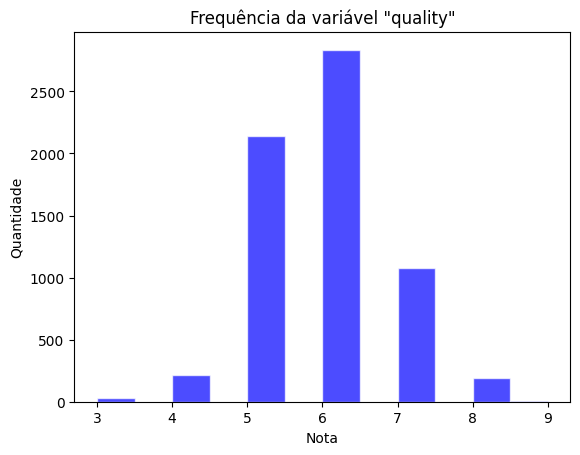

In [139]:
df_vinho_misturado.quality.hist(bins=12, # qtd de caixas
                                color='blue',
                                alpha=0.7, # transparência
                                grid=False, # grade da area de plotagem 
                                edgecolor='white', # cor de fundo
                                linewidth=1)
plt.title('Frequência da variável "quality"')
plt.xlabel('Nota')
plt.ylabel('Quantidade')

A maior concentração das amostras está na nota 6. Adicionarei uma coluna condicional, separando as amostras em 2 grupos: aqueles com nota >= 6 e aqueles com nota < 6. Será interpretado como amostras de "boa qualidade" (1) e de "má qualidade" (0).

### Criando a coluna "classification"

In [140]:
df_vinho_misturado['classification'] = np.where(df_vinho_misturado['quality'] < 6, 0, 1)
df_vinho_misturado.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,classification
0,7.2,0.160,0.35,1.2,0.031,27.0,84.0,0.99280,3.33,0.34,9.9,5,white,0
1,6.3,0.330,0.20,17.9,0.066,36.0,161.0,0.99910,3.14,0.51,8.8,5,white,0
2,6.3,0.550,0.45,13.0,0.047,33.0,182.0,0.99740,3.20,0.46,9.2,6,white,1
3,7.3,0.835,0.03,2.1,0.092,10.0,19.0,0.99660,3.39,0.47,9.6,5,red,0
4,6.3,0.300,0.91,8.2,0.034,50.0,199.0,0.99394,3.39,0.49,11.7,6,white,1


### Analisando a frequência da variável "classification"

Quantidade de cada classificação dentro da base de dados

Text(0, 0.5, 'Quantidade')

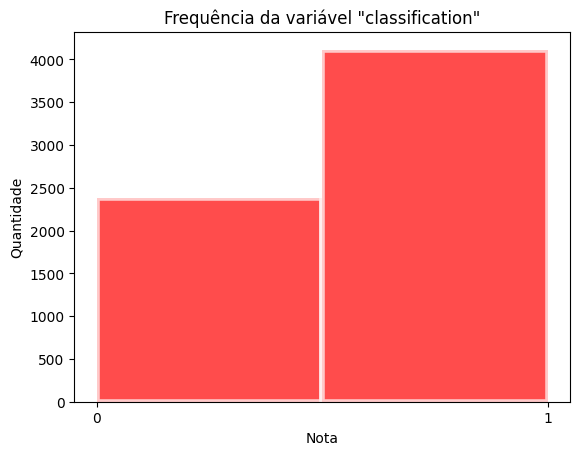

In [18]:
df_vinho_misturado.classification.hist(bins=2, # qtd de caixas
                                      color='red',
                                      alpha=0.7, # transparência
                                      grid=False, # grade na area da plotagem
                                      edgecolor='white', # cor de fundo
                                      linewidth=4)
plt.xticks([0,1])
plt.title('Frequência da variável "classification"')
plt.xlabel('Nota')
plt.ylabel('Quantidade')

### Salvando a base trabalhada

In [38]:
df_vinho_misturado.to_csv("data/df_vinho_misturado.csv", sep=';', encoding='utf-8', index=False, header=True)

# Análise dos Dados

### Importando base trabalhada anteriormente salva 
    Importei a biblioteca tensorflow para poder utilizar a gpu do meu computador
   

In [3]:
# carregando a base de dados salva anteriormente
df_vinho = pd.read_csv('data/df_vinho_misturado.csv', sep=';')
df_vinho.shape

(6497, 14)

#### Verificando os tipos de variáveis em cada coluna

In [4]:
df_vinho.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
color                    object
classification            int64
dtype: object

#### Verificando se existe algum valor NULO ou NaN

In [5]:
(df_vinho.isnull() | df_vinho.isna()).sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
classification          0
dtype: int64

#### Descrição do Data Frame

In [6]:
df_vinho.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,classification
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.633061
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.482007
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


#### Coluna cor ainda é uma variável categorica

Tem que transforma-la

In [7]:
cor = {
    'red': 2,
    'white': 3
}
df_vinho['color'] = df_vinho['color'].map(cor)

In [8]:
df_vinho.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
color                     int64
classification            int64
dtype: object

#### Lembrando que 'classfication' é a coluna ligada a qualidade do vinho

    (0) Vinhos ruim e (1) vinhos bom
    Na coluna de cor, coloquei valores manuais, para que diferenciasse da classification, algo que não iria mudar
    (2) red e (3) white
    
    Logo 'classification' será o meu alvo 
    A coluna 'quality' vou ignorar, porque ela não é relevante nesse momento

In [9]:
X = df_vinho.drop(['quality', 'classification'], axis=1)
y = df_vinho['classification']

#### Usarei 30% para teste

In [10]:
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size=0.3, random_state=42)

### Treinando com os modelos
    Procurei trabalhar com modelos que seriam de a classificação

##### Random Forest

In [300]:
modelRandom = RandomForestClassifier(n_estimators=100, random_state=42)

In [301]:
modelRandom.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [302]:
y_predRandom = modelRandom.predict(X_test)

In [303]:
acuraciaRandom = accuracy_score(y_test, y_predRandom)
recallRandom = recall_score(y_test, y_predRandom)
print(f'Acurácia: {acuraciaRandom}')
print(f'Recall: {recallRandom}')

Acurácia: 0.8143589743589743
Recall: 0.8743961352657005


##### Extra Trees

In [304]:
modelExtra = ExtraTreesClassifier(n_estimators=100, random_state=42)

In [305]:
modelExtra.fit(X_train, y_train)

ExtraTreesClassifier(random_state=42)

In [306]:
y_predExtra = modelExtra.predict(X_test)

In [307]:
acuraciaExtra = accuracy_score(y_test, y_predExtra)
recallExtra = recall_score(y_test, y_predExtra)
print(f'Acurácia: {acuraciaExtra}')
print(f'Recall: {recallExtra}')

Acurácia: 0.8261538461538461
Recall: 0.8840579710144928


##### Extreme Gradient Bossting

In [328]:
modelExtreme = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

In [329]:
modelExtreme.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [330]:
y_predExtreme = modelExtreme.predict(X_test)

In [331]:
acuraciaExtreme = accuracy_score(y_test, y_predExtreme)
recallExtreme = recall_score(y_test, y_predExtreme)
print(f'Acurácia: {acuraciaExtreme}')
print(f'Recall: {recallExtreme}')

Acurácia: 0.7994871794871795
Recall: 0.8599033816425121


##### Logistic Regression

In [178]:
modelLogistic = LogisticRegression(C=0.1, penalty='l2', solver='liblinear', 
                                   class_weight='balanced', random_state=42)

In [179]:
modelLogistic.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight='balanced', solver='liblinear')

In [180]:
y_predLogistic = modelLogistic.predict(X_test)

In [192]:
acuraciaLogistic = accuracy_score(y_test, y_predLogistic)
recallLogistic = recall_score(y_test, y_predLogistic)
print(f'Acurácia: {acuraciaLogistic}')
print(f'Recall: {recallLogistic}')

Acurácia: 0.7066666666666667
Recall: 0.6602254428341385


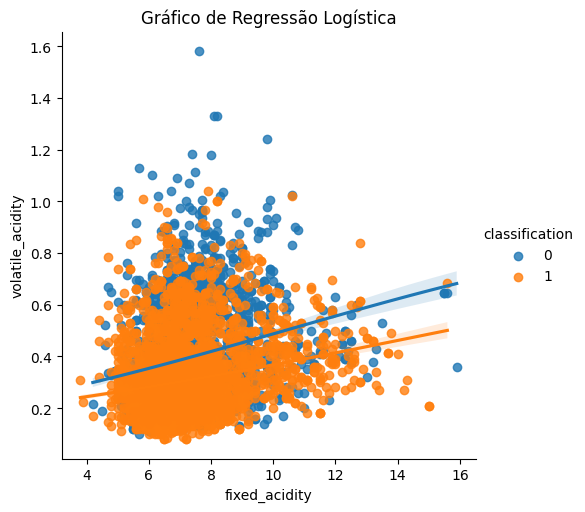

In [5]:
sns.lmplot(x='fixed_acidity', y='volatile_acidity', data=df_vinho, logistic=True, hue='classification')
plt.title('Gráfico de Regressão Logística')
plt.show()

#### Ilustração desse gráfico para poder dizer que a Logistic Regression está entre as que não deve ser escolhido quando se trabalha com classificação
   O objetivo da regressão linear é encontrar a equação da reta que melhor se ajusta ao conjunto de dados, isto é, encontrar a combinação dos coeficientes b0 (coeficiente linear) e b1 (coeficiente angular) que irá minimizar os erros de predição.
   Logo analisando o gráfico da para perceber que tem muitos dados disperço longe da reta fazendo com que tenha mais chances de erro. Então chega-se a conclusão que o Logistica Regression não é ideal para classificação. 

##### K Neighbors Classifier

In [194]:
modelKNN = KNeighborsClassifier(n_neighbors=10)

In [195]:
modelKNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [196]:
y_predKNN = modelKNN.predict(X_test)

In [197]:
acuraciaKNN = accuracy_score(y_test, y_predKNN)
recallKNN = recall_score(y_test, y_predKNN)
print(f'Acurácia: {acuraciaKNN}')
print(f'Recall: {recallKNN}')

Acurácia: 0.6641025641025641
Recall: 0.7359098228663447


No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


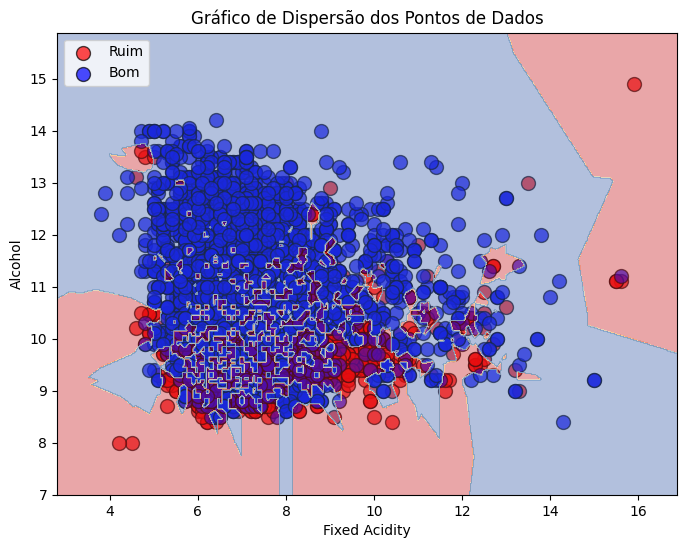

In [200]:
X = df_vinho[['fixed_acidity', 'alcohol']].to_numpy()
y = df_vinho['classification'].to_numpy()  # A classe de classificação que você deseja prever

# Crie um modelo KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

# Crie um gráfico de dispersão personalizado
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='red', label='Ruim', cmap=plt.cm.RdYlBu, marker='o', s=100, alpha=0.7, edgecolor='k')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='blue', label='Bom', cmap=plt.cm.RdYlBu, marker='o', s=100, alpha=0.7, edgecolor='k')
plt.title('Gráfico de Dispersão dos Pontos de Dados')
plt.xlabel('Fixed Acidity')
plt.ylabel('Alcohol')

# Crie uma malha de pontos para mostrar as regiões de decisão do KNN
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plote as regiões de decisão do KNN
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.4)

# Adicione uma legenda
plt.legend(loc='best')
plt.show()

#### Encontrando o melhor número de vizinhos

In [11]:
param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15]}

In [12]:
modeloKNN = KNeighborsClassifier()

In [13]:
grid_search = GridSearchCV(modeloKNN, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15]},
             scoring='accuracy')

In [14]:
best_k = grid_search.best_params_['n_neighbors']
best_score = grid_search.best_score_
print(f"Melhor valor de k: {best_k}")
print(f"Acurácia associada: {best_score}")

Melhor valor de k: 1
Acurácia associada: 0.714094706173914


In [15]:
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)
accuracy = best_knn.score(X_test, y_test)
print(f"Acurácia no conjunto de teste com o melhor k: {accuracy}")

Acurácia no conjunto de teste com o melhor k: 0.7276923076923076


##### Gráfico de comparação dos modelos



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



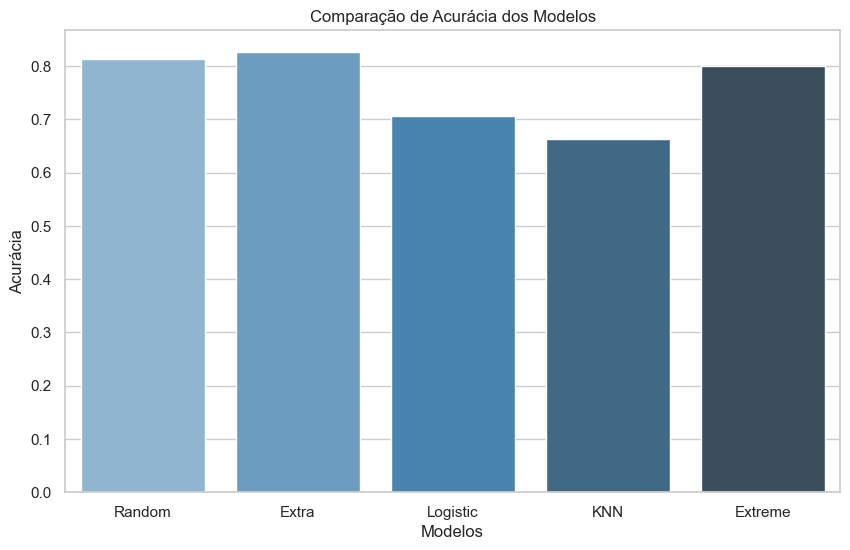

In [367]:
acuracias = [acuraciaRandom, acuraciaExtra, acuraciaLogistic, acuraciaKNN, acuraciaExtreme]
modelos = ["Random", "Extra", "Logistic", "KNN", "Extreme"]

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
ax = sns.barplot(x=modelos, y=acuracias, palette="Blues_d", legend=False)
ax.set(xlabel="Modelos", ylabel="Acurácia")
plt.title("Comparação de Acurácia dos Modelos")
plt.show()

#### Melhor modelo foi o Extra Trees aplicando o mesmo hiper parametros para os de arvores de decisão
    Os de arvores de decisão foram os que tiveram a melhor acurácia
    Acurácia: 0.8261538461538461

### Verificando as variáveis (colunas) que tem mais relevância na análise

In [381]:
X = df_vinho.drop(['quality', 'classification'], axis=1)
y = df_vinho['classification']

In [382]:
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size=0.3, random_state=42)

In [483]:
model = ExtraTreesClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
feature_importances = model.feature_importances_

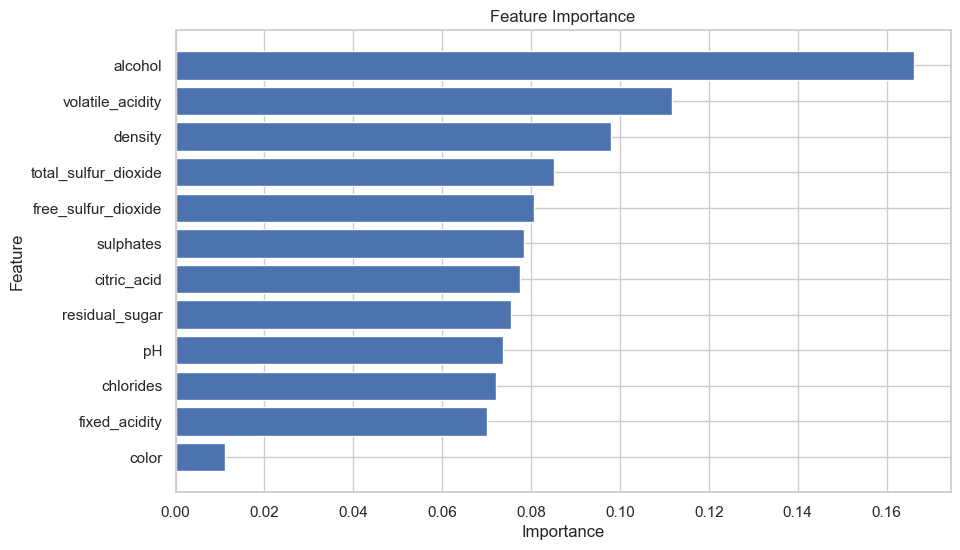

In [484]:
feature_names = X.columns # pega os nomes de cada coluna (variável)

# Criando um DataFrame com as importâncias das features e seus nomes
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Ordenando as features por importância (do maior para o menor)
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False) 

# Criando o gráfico de barras
plt.figure(figsize=(10, 6)) # tamanho
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance']) # barras na horizontal
plt.xlabel('Importance') # eixo X
plt.ylabel('Feature') # eixo Y
plt.title('Feature Importance') # TItulo
plt.gca().invert_yaxis()  # Inverte a ordem das features (mais importante no topo)
plt.show()

## Tetando otimizar

    Para obter melhores resultados

In [39]:
df_vinho.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,classification
0,6.3,0.57,0.28,2.1,0.048,13.0,49.0,0.99374,3.41,0.60,12.8,5,2,0
1,7.6,0.31,0.27,8.8,0.021,57.0,156.0,0.99442,3.08,0.38,11.0,7,3,1
2,6.7,0.22,0.22,1.2,0.038,5.0,124.0,0.99098,3.10,0.37,11.2,4,3,0
3,6.7,0.16,0.64,2.1,0.059,24.0,52.0,0.99494,3.34,0.71,11.2,6,2,1
4,11.3,0.34,0.45,2.0,0.082,6.0,15.0,0.99880,2.94,0.66,9.2,6,2,1


In [40]:
df_vinho.shape

(6497, 14)

### Primeira alteração no data frame para poder tentar melhorar a acuracia 
###### Ignorar a coluna menos relevante
    classification porque é meu alvo
    quality pois ela é descenecessária
    color porque é a menos relevante

In [485]:
X = df_vinho.drop(['quality', 'color', 'classification'], axis=1)
y = df_vinho['classification']

In [488]:
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size=0.3, random_state=42)

In [489]:
model = ExtraTreesClassifier(n_estimators=100, random_state=42)

In [490]:
model.fit(X_train, y_train)

ExtraTreesClassifier(random_state=42)

In [491]:
y_pred = model.predict(X_test)

In [492]:
acuracia = accuracy_score(y_test, y_pred)
print(f'Acurácia: {acuracia}')

Acurácia: 0.8205128205128205


#### A remoção da coluna 'color' teve uma leve diferença de acordo a acurácia anterior, mas para pior
    Primeira Acurácia: 0.8261538461538461
    Color removida Acurácia: 0.8205128205128205

### Segunda alteração no data frame

#### Eliminar duas colunas menos relevantes agora para tentar melhorar a acuracia

In [493]:
X = df_vinho.drop(['quality', 'color', 'fixed_acidity', 'classification'], axis=1) # ignorando as colunas para fazer a validação cruzada
y = df_vinho['classification']

In [494]:
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size=0.3, random_state=42)

In [495]:
model = ExtraTreesClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

ExtraTreesClassifier(random_state=42)

In [496]:
y_pred = model.predict(X_test)

In [497]:
acuracia = accuracy_score(y_test, y_pred)
print(f'Acurácia: {acuracia}')

Acurácia: 0.8235897435897436


#### A remoção da coluna 'color' e 'fixed_acidity' teve uma leve diferença de acordo a acurácia anterior e a primeira acuracia
    Primeira Acurácia: 0.8261538461538461
    Color removida Acurácia: 0.8205128205128205
    Color e Fixed_Acidity Acurácia: 0.8235897435897436
Melhorou em relação ao segundo teste

### Terceira alteração no data frame

#### Eliminar três colunas menos relevantes

In [498]:
X = df_vinho.drop(['quality', 'color', 'fixed_acidity', 'pH', 'classification'], axis=1) # ignorando as colunas para fazer a validação cruzada
y = df_vinho['classification']

In [499]:
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size=0.3, random_state=42)

In [500]:
model = ExtraTreesClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

ExtraTreesClassifier(random_state=42)

In [501]:
y_pred = model.predict(X_test)

In [502]:
acuracia = accuracy_score(y_test, y_pred)
print(f'Acurácia: {acuracia}')

Acurácia: 0.8164102564102564


#### A remoção da coluna 'color', 'fixed_acidity' e 'pH' não melhoru a acuracia em relação ao primeiro teste sem alterações
    Primeira Acurácia: 0.8261538461538461
    Color removida Acurácia: 0.8205128205128205
    Color e Fixed_Acidity Acurácia: 0.8235897435897436
    Color, Fixed_Acidity e pH Acurácia: 0.8164102564102564
Piorou em relação a todos os testes

#### Escolha do melhor hiperparâmetro
    Aplicando verificação de hiper

In [150]:
param_grid = {
    'n_estimators': [50, 100, 200, 300, 400],
    'max_depth': [None, 5, 10, 15, 20, 25, 30],
    'min_samples_split': [2, 7, 10, 12, 15, 17, 20],
    'min_samples_leaf': [2, 5, 7, 10, 12, 15, 18],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

In [59]:
X = df_vinho.drop(['quality', 'classification'], axis=1)
y = df_vinho['classification']

In [107]:
X_train, X_test, y_train, y_test, = train_test_split(X, y, 
                                                     test_size=0.3, 
                                                     random_state=42)

#### Depois de algumas pesquisas, resolvi aplicar alguns valores nos hiperparametros para tentar melhorar o modelo
    1.'n_estimators': Controla o numero de árvores de decisão no conjunto
    2.'max_depth': Define a profundidade máxima das árvores de decisão no conjunto. Limitar pode ajudar a evitar o sobreajuste, pois as árvores são menos profundas.
    3.'min_samples_split': É o número mínimo de amostras necessárias para dividir um nó interno. Isso controla quando uma divisão é permitida durante a construção da árvore.
    4.'min_samples_leaf': Define o número mínimo de amostras necessárias para ser considerado um nó folha. Isso controla o tamanho mínimo das folhas da árvore.
    5.'max_features': Controla o número máximo de características a serem consideradas em cada divisão de nó. 'sqrt' significa que o modelo usará a raiz quadrada do número total de características, enquanto 'log2' usará o logaritmo base 2 do número total de características.
    6.'criterion': Especifica a função de critério usada para medir a qualidade da divisão em cada nó. 'gini' usa o índice de Gini, que mede a impureza dos grupos, enquanto 'entropy' usa a entropia, que mede a incerteza ou impureza dos grupos.

In [27]:
model = ExtraTreesClassifier(random_state=42)

In [152]:
# Será realizado em 5 dobras para avaliar o desempenho do modelo
grid_search = GridSearchCV(model, param_grid, scoring='accuracy', cv=5) 

In [153]:
# Treina o modelo otimizado
grid_search.fit(X_train, y_train)

C:\Users\iuric\anaconda3\envs\IA\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
17150 fits failed out of a total of 51450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
17150 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\iuric\anaconda3\envs\IA\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\iuric\anaconda3\envs\IA\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\iuric\anaconda3\envs\IA\lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "C:

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20, 25, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [2, 5, 7, 10, 12, 15, 18],
                         'min_samples_split': [2, 7, 10, 12, 15, 17, 20],
                         'n_estimators': [50, 100, 200, 300, 400]},
             scoring='accuracy')

In [154]:
# Obtendo os melhores hiperparâmetros encontrados
best_params = grid_search.best_params_
print(f"Melhores hiperparâmetros: {best_params}")

Melhores hiperparâmetros: {'criterion': 'entropy', 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [155]:
# Previsões no conjunto de teste
y_pred = grid_search.predict(X_test)

In [156]:
# Avalie o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy}')

Acurácia: 0.8184615384615385


#### Mesmo aplicando algumas grades de hiperparametros
    A acurácia não melhorou em relação ao primeiro teste com a Extra Trees

#### Logo cheguei a conclusão que não tem como melhorar mais a acurácia
    Como tinha chegado no resultado anterior, o Extra Trees foi o melhor modelo, e seu hiperparametros serão os inicias utilizados antes 
    Acurácia: 0.8261538461538461

In [474]:
X = df_vinho.drop(['quality', 'classification'], axis=1)
y = df_vinho['classification']

In [475]:
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size=0.3, random_state=42)

In [482]:
model = ExtraTreesClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acuracia = accuracy_score(y_test, y_pred)
print(f'Acurácia: {acuracia}')

Acurácia: 0.8261538461538461


In [477]:
importancias = model.feature_importances_
variaveis = X.columns
df = pd.DataFrame({'Variavel': variaveis, 'High': importancias, 'Low': importancias})

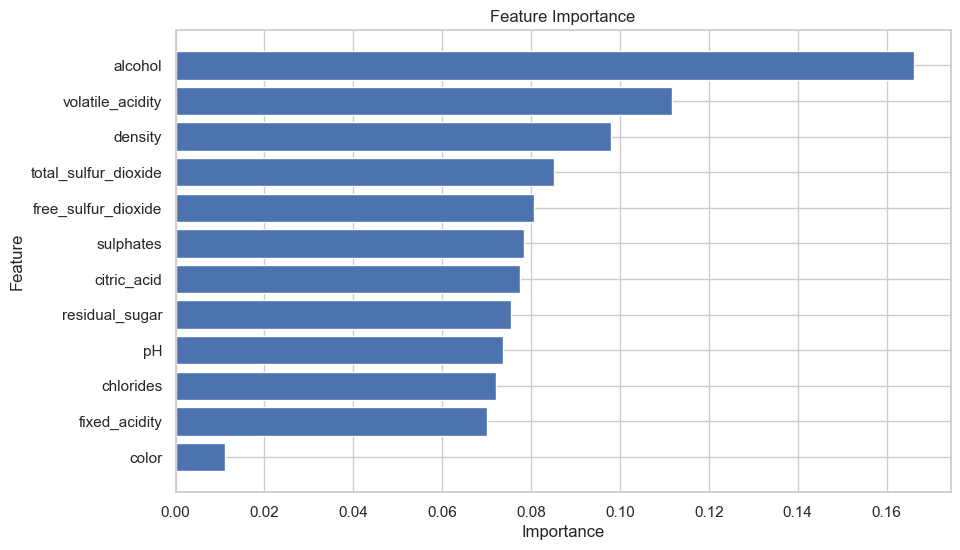

In [478]:
# Criando um DataFrame com as importâncias das features e seus nomes
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Ordenando as features por importância (do maior para o menor)
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Inverte a ordem das features (mais importante no topo)
plt.show()

In [38]:
X = df_vinho.drop(['quality', 'classification'], axis=1)
y = df_vinho['classification']

In [39]:
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size=0.3, random_state=42)

In [40]:
model = ExtraTreesClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acuracia = accuracy_score(y_test, y_pred)
print(f'Acurácia: {acuracia}')

Acurácia: 0.8261538461538461


In [23]:
# Calcula os valores SHAP
explainer = shap.TreeExplainer(model=model) # Como o modelo é baseado em árvore, o calculo tem que ser em árvore
shap_values = explainer.shap_values(X_train, y_train)

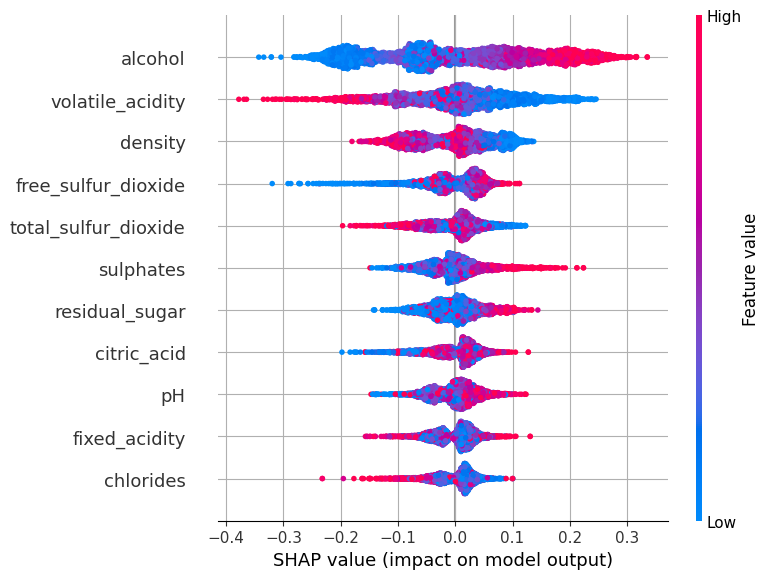

In [33]:
# Gráfico - Contribução das variáveis
shap.summary_plot(shap_values[1], X_train, plot_type="dot", show=False);
# Adicione uma grade personalizada
plt.grid(True)
# Exiba o gráfico
plt.show()

A feature mais importante do modelo é a alcohol, que nos mostra que quanto maior o teor alcoólico, maior a chance da amostra ser boa.

A segunda feature mais importante é a volatile_acidity, que quanto maior for, menor a chance da amostra ser boa.

A terceira feature, density, tem a mesma relação inversa que a anterior. Ou seja, quanto maior ela for, menos a chance da amostra ser boa

As features sulfates, free_súlfur_dioxide, citric_acid e residual_sugar indicam maiores chances da amostra ser boa quanto maior elas forem.

### Matriz de confusão

In [396]:
X = df_vinho.drop(['quality', 'classification'], axis=1)
y = df_vinho['classification']

In [397]:
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size=0.3, random_state=42)

In [398]:
model = ExtraTreesClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acuracia = accuracy_score(y_test, y_pred)
print(f'Acurácia: {acuracia}')

Acurácia: 0.8261538461538461


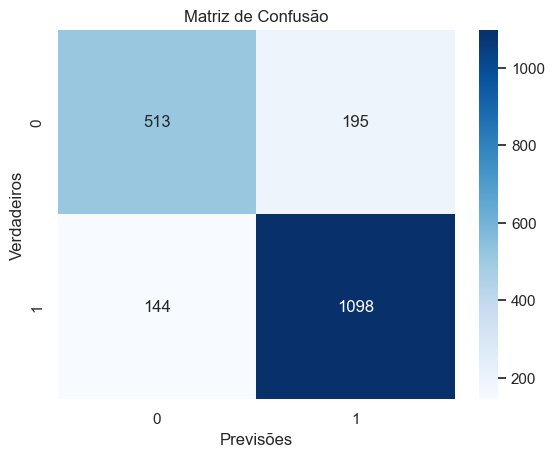

In [400]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Previsões')
plt.ylabel('Verdadeiros')
plt.title('Matriz de Confusão')
plt.show()

### Validação cruzada

In [67]:
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Pontuações de validação cruzada:", scores)
print("Precisão média:", scores.mean())
print("Desvio padrão das pontuações:", scores.std())

Pontuações de validação cruzada: [0.83538462 0.82923077 0.82140108 0.83987683 0.85142417]
Precisão média: 0.8354634926274651
Desvio padrão das pontuações: 0.010107674379335333


#### Mostrando
    Acurácia
    Precisão 
    Recall
    F1-Score

In [69]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Acurácia: {accuracy}")
print(f"Precisão: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Acurácia: 0.8261538461538461
Precisão: 0.8491879350348028
Recall: 0.8840579710144928
F1-Score: 0.8662721893491124


### Curva ROC

In [30]:
X = df_vinho.drop(['quality', 'classification'], axis=1)
y = df_vinho['classification']

In [31]:
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
model = ExtraTreesClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1] # classe 1 (positivo)

In [33]:
def plot_ROC(falsePositiveRate, truePositiveRate, areaUnderCurve):
    fig = plt.figure()
    fig.set_size_inches( 15, 5 )
    rocCurve = fig.add_subplot( 1, 2, 1 )

    rocCurve.plot(falsePositiveRate, truePositiveRate, color = 'darkgreen',
             lw = 3, label = 'ROC curve (AUC = %0.2f)' % areaUnderCurve)
    rocCurve.plot( [0, 1], [0, 1], color = 'navy', lw = 1, linestyle = '--' )
    plt.grid()
    plt.xlim( [0.0, 1.0] )
    rocCurve.set_xticks( np.arange( -0.1, 1.0, 0.1 ) )
    plt.ylim( [0.0, 1.05] )
    rocCurve.set_yticks( np.arange( 0, 1.05, 0.1 ) )
    plt.xlabel( 'False Positive Rate' )
    plt.ylabel( 'True Positive Rate' )
    plt.title( 'ROC' )
    rocCurve.legend( loc = "lower right" ) # posição da legenda
    return plt

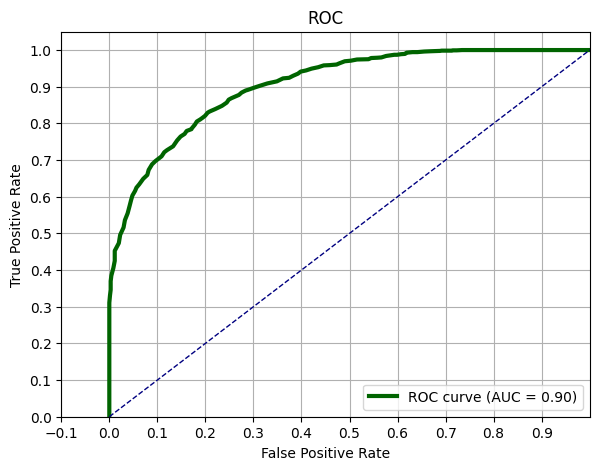

In [34]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
plot_ROC(fpr, tpr, roc_auc)
plt.show()

### Aplicando o modelo treinado na base de dados

In [137]:
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size=0.3, random_state=42)

In [138]:
model = ExtraTreesClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

ExtraTreesClassifier(random_state=42)

    Selecionando as colunas menos a quality, pois ela é desnecessária
    Tirei também a classification, pois é o alvo, a comparação vai ser entre os classifications

In [139]:
selected_columns = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'color']
X_test_final = df_vinho[selected_columns]
pred = model.predict(X_test_final)
pred

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [140]:
df_vinho_pred = df_vinho.copy()

In [141]:
df_vinho_pred

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,classification
0,6.3,0.57,0.28,2.10,0.048,13.0,49.0,0.99374,3.41,0.60,12.8,5,2,0
1,7.6,0.31,0.27,8.80,0.021,57.0,156.0,0.99442,3.08,0.38,11.0,7,3,1
2,6.7,0.22,0.22,1.20,0.038,5.0,124.0,0.99098,3.10,0.37,11.2,4,3,0
3,6.7,0.16,0.64,2.10,0.059,24.0,52.0,0.99494,3.34,0.71,11.2,6,2,1
4,11.3,0.34,0.45,2.00,0.082,6.0,15.0,0.99880,2.94,0.66,9.2,6,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,7.1,0.23,0.39,13.70,0.058,26.0,172.0,0.99755,2.90,0.46,9.0,6,3,1
6493,6.8,0.23,0.32,1.60,0.026,43.0,147.0,0.99040,3.29,0.54,12.5,6,3,1
6494,8.3,0.49,0.23,6.65,0.034,6.0,158.0,0.99344,3.05,0.48,11.2,5,3,0
6495,8.2,0.35,0.33,2.40,0.076,11.0,47.0,0.99599,3.27,0.81,11.0,6,2,1


#### Como tinha alterado a coluna cor 
    Retornar a coluna cor para o tipo de variável correto, em vez de numero o nome da cor
    Mas isso aplicado no data frame predição

In [142]:
cor = {
    2: 'red',
    3: 'white'
}
df_vinho_pred['color'] = df_vinho_pred['color'].map(cor)

In [143]:
df_vinho_pred['predicted_classification'] = pred
df_vinho_pred['correct'] = df_vinho_pred['predicted_classification'] == df_vinho_pred['classification']

In [144]:
df_vinho_pred

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,classification,predicted_quality,correct
0,6.3,0.57,0.28,2.10,0.048,13.0,49.0,0.99374,3.41,0.60,12.8,5,red,0,0,True
1,7.6,0.31,0.27,8.80,0.021,57.0,156.0,0.99442,3.08,0.38,11.0,7,white,1,1,True
2,6.7,0.22,0.22,1.20,0.038,5.0,124.0,0.99098,3.10,0.37,11.2,4,white,0,0,True
3,6.7,0.16,0.64,2.10,0.059,24.0,52.0,0.99494,3.34,0.71,11.2,6,red,1,1,True
4,11.3,0.34,0.45,2.00,0.082,6.0,15.0,0.99880,2.94,0.66,9.2,6,red,1,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,7.1,0.23,0.39,13.70,0.058,26.0,172.0,0.99755,2.90,0.46,9.0,6,white,1,1,True
6493,6.8,0.23,0.32,1.60,0.026,43.0,147.0,0.99040,3.29,0.54,12.5,6,white,1,1,True
6494,8.3,0.49,0.23,6.65,0.034,6.0,158.0,0.99344,3.05,0.48,11.2,5,white,0,1,False
6495,8.2,0.35,0.33,2.40,0.076,11.0,47.0,0.99599,3.27,0.81,11.0,6,red,1,1,True


In [145]:
#salvando dados modelados

df_vinho_pred.to_csv("data/df_vinho_ExtraTreeClass.csv", sep=';', encoding='utf-8', index=False, header=True)

In [148]:
import joblib
joblib.dump(model, 'data/modelo_vinho_14102023.pkl')

['data/modelo_vinho_14102023.pkl']